# Capitolul 1: Introducere în Reducerea Dimensionalității

Bun venit la cursul despre **reducerea dimensionalității**! În machine learning, când lucrăm cu seturi de date, fiecare coloană (cu excepția țintei) este considerată o **dimensiune** sau o **caracteristică** (*feature*). Un set de date cu 10 caracteristici este un set de date 10-dimensional. Deși poate părea că mai multe date (dimensiuni) înseamnă informații mai bune, acest lucru nu este întotdeauna adevărat. Uneori, un număr foarte mare de dimensiuni poate crea probleme, un fenomen cunoscut sub numele de **"Blestemul Dimensionalității"** (*Curse of Dimensionality*).

## Blestemul Dimensionalității (Curse of Dimensionality)

Acest concept descrie provocările care apar atunci când lucrăm cu date în spații cu multe dimensiuni. Imaginați-vă că aveți puncte pe o linie (1D). Acestea sunt destul de apropiate. Acum, adăugați aceleași puncte pe o foaie de hârtie (2D) și apoi într-o cutie (3D). Pe măsură ce adăugăm dimensiuni, distanța medie dintre puncte crește, iar datele devin din ce în ce mai **rare** (*sparse*).

Acest lucru duce la câteva probleme:
* **Complexitate computațională crescută**: Mai multe dimensiuni înseamnă mai multă putere de calcul necesară pentru a antrena modele.
* **Diminuarea utilității distanței**: Măsurătorile de distanță (cum ar fi distanța euclidiană) devin mai puțin relevante, afectând algoritmi precum K-Nearest Neighbors.
* **Supra-antrenare (Overfitting)**: Modelele pot învăța zgomotul din date în loc de tiparele reale, deoarece există prea multe caracteristici din care să "învețe".

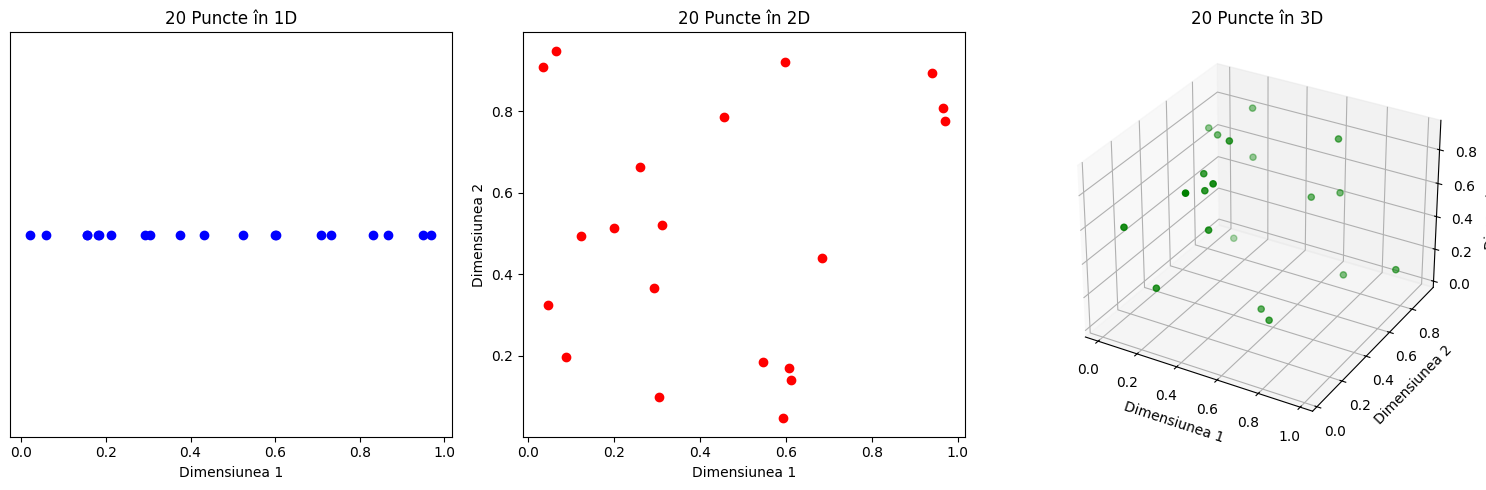

In [1]:
# Exemplu 1: Vizualizarea rarității datelor
# Să generăm 20 de puncte aleatorii în spații 1D, 2D și 3D pentru a observa cum se distanțează.

import numpy as np
import matplotlib.pyplot as plt

# Generăm datele
np.random.seed(42)
points_1d = np.random.rand(20, 1)
points_2d = np.random.rand(20, 2)
points_3d = np.random.rand(20, 3)

# Creăm figura pentru grafice
fig = plt.figure(figsize=(15, 5))

# Grafic 1D
ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(points_1d, np.zeros_like(points_1d), c='blue')
ax1.set_title('20 Puncte în 1D')
ax1.set_xlabel('Dimensiunea 1')
ax1.get_yaxis().set_visible(False)

# Grafic 2D
ax2 = fig.add_subplot(1, 3, 2)
ax2.scatter(points_2d[:, 0], points_2d[:, 1], c='red')
ax2.set_title('20 Puncte în 2D')
ax2.set_xlabel('Dimensiunea 1')
ax2.set_ylabel('Dimensiunea 2')

# Grafic 3D
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.scatter(points_3d[:, 0], points_3d[:, 1], points_3d[:, 2], c='green')
ax3.set_title('20 Puncte în 3D')
ax3.set_xlabel('Dimensiunea 1')
ax3.set_ylabel('Dimensiunea 2')
ax3.set_zlabel('Dimensiunea 3')

plt.tight_layout()
plt.show()

# OBS.: Observați cum în graficul 3D, punctele par mult mai împrăștiate și
# izolate decât pe linia 1D. Aceasta este o demonstrație vizuală a modului în
# care datele devin mai rare pe măsură ce dimensiunile cresc.

## De ce reducem dimensionalitatea?

**Reducerea dimensionalității** este procesul de a micșora numărul de caracteristici (dimensiuni) dintr-un set de date, păstrând în același timp cât mai multă informație relevantă. Facem acest lucru pentru a:

* **Îmbunătăți eficiența computațională**: Modelele se antrenează mai rapid pe date cu mai puține coloane.
* **Utiliza mai puțin spațiu de memorie**: Seturile de date devin mai mici și mai ușor de gestionat.
* **Elimina zgomotul și redundanța**: Unele caracteristici pot fi irelevante (zgomot) sau pot oferi aceeași informație ca altele (redundante).
* **Evita supra-antrenarea (overfitting)**: Un model mai simplu (cu mai puține caracteristici) este mai puțin predispus la overfitting.
* **Îmbunătăți vizualizările**: Este imposibil să vizualizăm date în mai mult de 3 dimensiuni. Reducerea la 2D sau 3D ne ajută să înțelegem structura datelor.

## Metode de Reducere a Dimensionalității

Există două abordări principale pentru a reduce dimensionalitatea:

1.  **Selecția de Caracteristici (Feature Selection)**: Alegem un subset al celor mai importante caracteristici din setul de date original și renunțăm la celelalte.
2.  **Extragerea de Caracteristici (Feature Extraction)**: Creăm caracteristici noi, care sunt combinații ale celor vechi, și folosim aceste caracteristici noi pentru a reprezenta datele.

### 1. Selecția de Caracteristici (Feature Selection)

Această metodă este ca și cum am face "curățenie" în setul de date. Ne uităm la toate caracteristicile disponibile și le păstrăm doar pe cele care sunt cu adevărat critice pentru a rezolva problema.

De exemplu, dacă vrem să prezicem prețul unei case, caracteristici precum `suprafața utilă`, `numărul de camere` și `locația` sunt esențiale. Caracteristici precum `culoarea ușii de la intrare` sau `numele fostului proprietar` sunt, cel mai probabil, irelevante și pot fi eliminate.

In [ ]:
# __EXERCIȚIU__
# Să presupunem că avem următorul DataFrame pandas cu date despre studenți.
# Obiectivul nostru este să prezicem nota finală (`nota_finala`).
# Inspectați vizual coloanele și creați un nou DataFrame, `studenti_modificat`,
# care conține doar coloanele pe care le considerați relevante pentru a prezice
# nota. Justificați-vă alegerea într-un comentariu.

import pandas as pd

data_studenti = {
    'id_student': [101, 102, 103, 104, 105], # x
    'nume_student': ['Popescu Ion', 'Ionescu Ana', 'Georgescu V.', 'Marinescu G.', 'Radulescu M.'], # x
    'ore_studiu_saptamanal': [15, 20, 8, 12, 18], # !
    'note_tema': [8, 9, 6, 7, 9], # !
    'prezenta_curs': [0.95, 0.98, 0.70, 0.85, 0.99], # !
    'culoare_ghiozdan': ['albastru', 'rosu', 'negru', 'albastru', 'verde'], # x
    'nota_finala': [9, 10, 7, 8, 10]
}

studenti_df = pd.DataFrame(data_studenti)

# Justificare: ... (completați aici)
coloane_relevante = [] # Completați lista cu numele coloanelor relevante

studenti_modificat = studenti_df[coloane_relevante]

print("DataFrame original:")
print(studenti_df)
print("\nDataFrame după selecția de caracteristici:")
print(studenti_modificat)


# HINT: Gândiți-vă ce factori influențează performanța unui student.

### 2. Extragerea de Caracteristici (Feature Extraction)

Spre deosebire de selecție, unde doar alegem din ce există, extragerea de caracteristici **transformă** datele. Această metodă generează un set complet nou de caracteristici, prin combinarea celor vechi. Noile caracteristici sunt de obicei mai puține la număr, dar condensează informația importantă din setul de date original.

Imaginați-vă că priviți un obiect 3D. Îl puteți proiecta pe o foaie 2D (umbra sa). Ați redus dimensionalitatea de la 3 la 2, dar umbra încă păstrează multe informații despre forma obiectului. Algoritmii de extragere fac ceva similar: găsesc cele mai bune "proiecții" ale datelor într-un spațiu cu mai puține dimensiuni.

Cei mai populari algoritmi pentru extragerea de caracteristici sunt **Principal Component Analysis (PCA)** și **t-distributed Stochastic Neighbour Embedding (t-SNE)**.

## Principal Component Analysis (PCA)

**PCA** este cel mai popular algoritm de reducere a dimensionalității. Este o tehnică **liniară** care transformă setul de date într-un nou sistem de coordonate. În acest nou sistem, caracteristicile (numite **componente principale**) sunt **necorelate** liniar, iar cea mai mare parte a **varianței** (informației) din date este concentrată în primele câteva componente.

Gândiți-vă la un nor de puncte în 3D care are forma unei elipse alungite. PCA va găsi o nouă axă (prima componentă principală) care trece de-a lungul celei mai mari lungimi a elipsei, deoarece aceasta este direcția cu cea mai mare variație a datelor. A doua componentă va fi perpendiculară pe prima și va descrie următoarea cea mai mare variație, și așa mai departe.

In [3]:
# Pentru a lucra cu exemplele, vom clona un repository cu seturi de date
!git clone https://github.com/matzim95/ML-datasets

Cloning into 'ML-datasets'...
remote: Enumerating objects: 201, done.
remote: Counting objects: 100% (141/141), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 201 (delta 35), reused 124 (delta 24), pack-reused 60 (from 1)
Receiving objects: 100% (201/201), 35.87 MiB | 14.63 MiB/s, done.
Resolving deltas: 100% (47/47), done.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic acid                    178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity of ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD280/OD315 of diluted wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
 13  Class

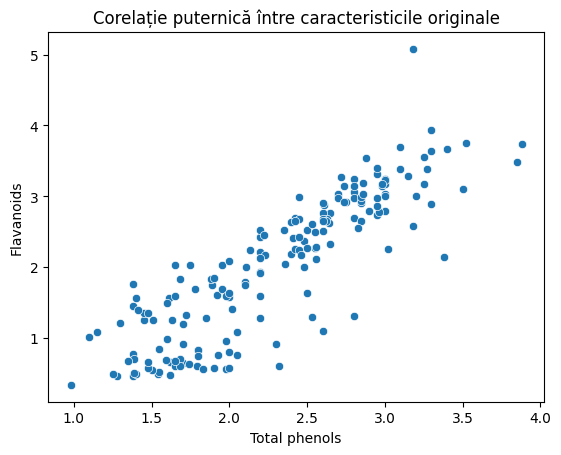

In [6]:
# Exemplu 1: Încărcarea datelor și vizualizarea corelației
# Vom folosi setul de date 'wine', care are 13 caracteristici despre diferite
# vinuri.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_wine = pd.read_csv('ML-datasets/wine.csv')
print(df_wine.info())
# Separăm caracteristicile de țintă
X_wine = df_wine.drop('Class', axis=1)
y_wine = df_wine['Class']

# Să ne uităm la corelația dintre 'Total phenols' și 'Flavanoids'
print(f"Corelația inițială: {X_wine['Total phenols'].corr(X_wine['Flavanoids']):.4f}")

sns.scatterplot(data=X_wine, x='Total phenols', y='Flavanoids')
plt.title('Corelație puternică între caracteristicile originale')
plt.show()

# OBS.: Există o corelație liniară puternică între aceste două caracteristici.
# PCA este eficient în a reduce această redundanță.

Corelația dintre PC1 și PC2: 0.0000000000


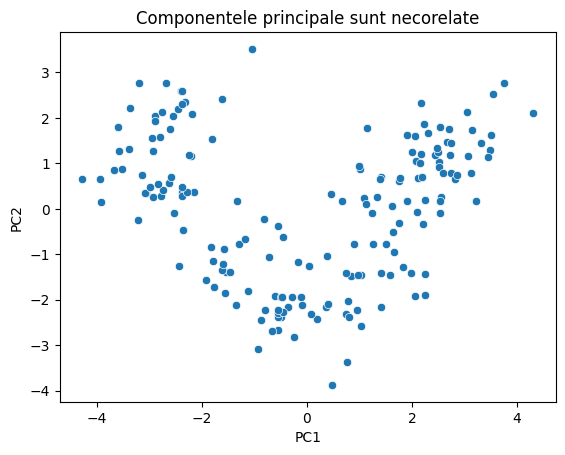

In [5]:
# Exemplu 2: Aplicarea PCA și verificarea corelației componentelor

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# IMPORTANT: PCA este sensibil la scala datelor. Este esențial să
# standardizăm datele înainte de a aplica PCA.
scaler = StandardScaler()
X_wine_scaled = scaler.fit_transform(X_wine)

# Inițializăm PCA. Fără a specifica n_components, va crea atâtea componente
# câte caracteristici originale sunt.
pca = PCA()
X_wine_pca = pca.fit_transform(X_wine_scaled)

# Transformăm rezultatul înapoi într-un DataFrame pentru a fi mai lizibil
df_wine_pca = pd.DataFrame(X_wine_pca, columns=[f'PC{i+1}' for i in range(X_wine.shape[1])])

# Verificăm corelația dintre primele două componente principale (PC1 și PC2)
print(f"Corelația dintre PC1 și PC2: {df_wine_pca['PC1'].corr(df_wine_pca['PC2']):.10f}")

sns.scatterplot(data=df_wine_pca, x='PC1', y='PC2')
plt.title('Componentele principale sunt necorelate')
plt.show()

# OBS.: Corelația dintre primele două componente principale este practic zero.
# PCA a reușit să creeze noi caracteristici care sunt independente liniar.

In [ ]:
# __EXERCIȚIU__
# Încarcă setul de date 'iris' din 'ML-datasets/iris.csv'.
# 1. Alege două coloane care crezi că sunt corelate și calculează/afișează
# corelația dintre ele.
# 2. Standardizează datele (fără coloana 'species').
# 3. Aplică PCA pe datele standardizate.
# 4. Calculează și afișează corelația dintre primele două componente principale
# (PC1 și PC2).

# Încarcă datele
df_iris = pd.read_csv('ML-datasets/iris.csv')
X_iris = df_iris.drop('species', axis=1)

# 1. Calculează corelația inițială
corelatie_initiala = # ...
print(f"Corelația inițială aleasă: {corelatie_initiala:.4f}")

# 2. Standardizează datele
scaler_iris = StandardScaler()
X_iris_scaled = # ...

# 3. Aplică PCA
pca_iris = PCA()
X_iris_pca = # ...
df_iris_pca = pd.DataFrame(X_iris_pca, columns=['PC1', 'PC2', 'PC3', 'PC4'])

# 4. Calculează corelația finală
corelatie_pca = # ...
print(f"Corelația dintre PC1 și PC2 după PCA: {corelatie_pca:.10f}")

# HINT: Urmează pașii din exemplul anterior. Coloanele 'petal length (cm)' și
# 'petal width (cm)' sunt bune candidate pentru corelație.

### Varianța Explicată (Explained Variance)

După aplicarea PCA, nu toate componentele principale sunt la fel de "importante". Primele componente captează cea mai mare parte a variabilității (informației) din date. Putem analiza atributul `explained_variance_ratio_` al modelului PCA pentru a vedea ce procent din varianța totală este explicat de fiecare componentă.

Acest lucru ne ajută să decidem câte componente să păstrăm. Dacă primele 2-3 componente explică, de exemplu, 95% din varianța totală, putem renunța la celelalte fără a pierde prea multă informație.

Varianța explicată de fiecare componentă:
  PC1: 36.20%
  PC2: 19.21%
  PC3: 11.12%
  PC4: 7.07%
  PC5: 6.56%
  PC6: 4.94%
  PC7: 4.24%
  PC8: 2.68%
  PC9: 2.22%
  PC10: 1.93%
  PC11: 1.74%
  PC12: 1.30%
  PC13: 0.80%

Varianța cumulativă:
  Până la PC1: 36.20%
  Până la PC2: 55.41%
  Până la PC3: 66.53%
  Până la PC4: 73.60%
  Până la PC5: 80.16%
  Până la PC6: 85.10%
  Până la PC7: 89.34%
  Până la PC8: 92.02%
  Până la PC9: 94.24%
  Până la PC10: 96.17%
  Până la PC11: 97.91%
  Până la PC12: 99.20%
  Până la PC13: 100.00%


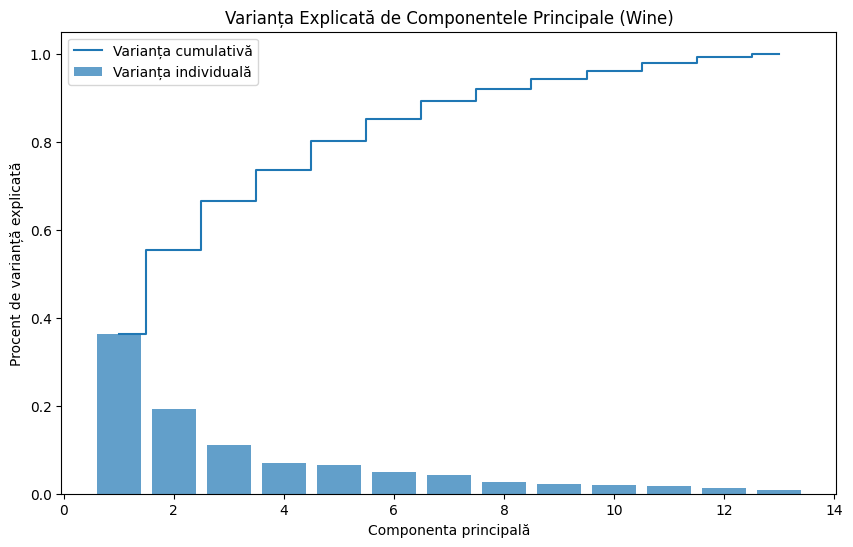

In [7]:
# Exemplu 3: Analiza varianței explicate

# Folosim modelul pca antrenat pe datele 'wine'
explained_variance = pca.explained_variance_ratio_

print("Varianța explicată de fiecare componentă:")
for i, variance in enumerate(explained_variance):
    print(f"  PC{i+1}: {variance*100:.2f}%")

# Afișăm varianța cumulativă
cumulative_variance = np.cumsum(explained_variance)
print("\nVarianța cumulativă:")
for i, variance in enumerate(cumulative_variance):
    print(f"  Până la PC{i+1}: {variance*100:.2f}%")

# Vizualizăm varianța explicată cu un grafic
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center', label='Varianța individuală')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Varianța cumulativă')
plt.ylabel('Procent de varianță explicată')
plt.xlabel('Componenta principală')
plt.title('Varianța Explicată de Componentele Principale (Wine)')
plt.legend(loc='best')
plt.show()

# OBS.: Primele două componente (PC1 și PC2) explică împreună aproximativ 55%
# din varianța totală. Primele 8 componente explică peste 90%. Acest grafic
# este esențial pentru a decide câte dimensiuni să păstrăm.

In [ ]:
# __EXERCIȚIU__
# Folosind modelul PCA antrenat anterior pe setul de date 'iris' (`pca_iris`),
# 1. Calculează și afișează varianța explicată individuală și cumulativă pentru
# fiecare componentă.
# 2. Creează un grafic similar cu cel din exemplu pentru a vizualiza varianța
# explicată.
# 3. Răspunde într-un comentariu: Câte componente principale explică peste 95%
# din varianța totală?

# 1. Calculează varianța
variance_iris = # ...
cumulative_variance_iris = # ...

print("Varianța explicată (Iris):") # ...

print("\nVarianța cumulativă (Iris):") # ...

# 2. Creează graficul
# ...

# 3. Răspuns:
# ...

# HINT: Atributul este `explained_variance_ratio_`. Folosește `np.cumsum()`
# pentru suma cumulativă.

### Reducerea Efectivă a Dimensionalității

Acum că știm cum să analizăm varianța, putem folosi PCA pentru a reduce efectiv numărul de dimensiuni. Facem acest lucru specificând parametrul `n_components` la inițializarea modelului PCA. De exemplu, `PCA(n_components=2)` va reduce setul de date la doar 2 dimensiuni.

Dimensiunea originală a datelor: (178, 13)
Dimensiunea redusă a datelor: (178, 2)


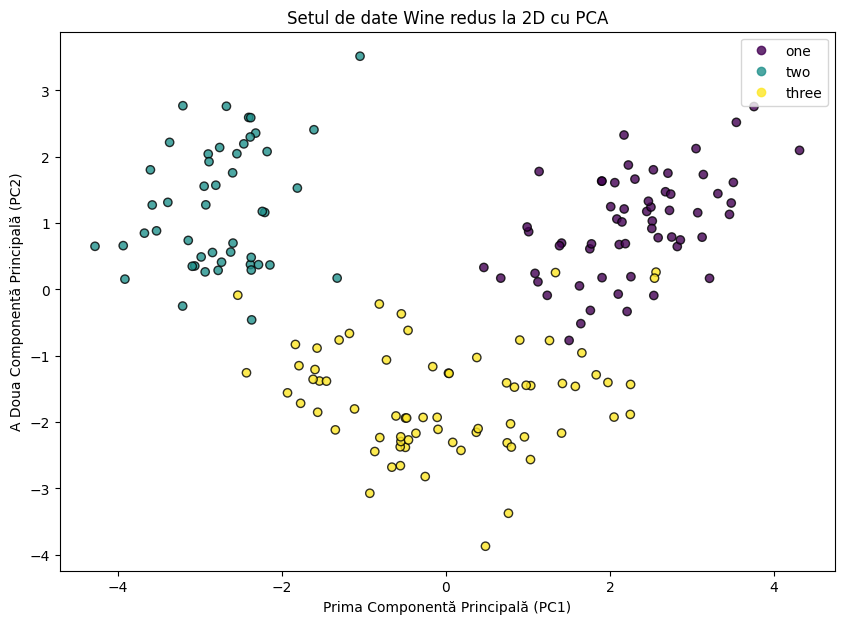

In [8]:
# Exemplu 4: Reducerea setului de date 'wine' la 2 dimensiuni

# Refolosim datele standardizate X_wine_scaled

# Inițializăm PCA pentru a păstra doar 2 componente
pca_2d = PCA(n_components=2)

# Aplicăm transformarea
X_wine_reduced = pca_2d.fit_transform(X_wine_scaled)

print(f"Dimensiunea originală a datelor: {X_wine_scaled.shape}")
print(f"Dimensiunea redusă a datelor: {X_wine_reduced.shape}")

# Vizualizăm datele reduse, colorând punctele în funcție de clasa de vin
# (ținta y_wine)
plt.figure(figsize=(10, 7))
wine_labels_numeric = y_wine.astype('category').cat.codes
scatter = plt.scatter(X_wine_reduced[:, 0], X_wine_reduced[:, 1], c=wine_labels_numeric, cmap='viridis', edgecolor='k', alpha=0.8)
plt.title('Setul de date Wine redus la 2D cu PCA')
plt.xlabel('Prima Componentă Principală (PC1)')
plt.ylabel('A Doua Componentă Principală (PC2)')
plt.legend(handles=scatter.legend_elements()[0], labels=list(df_wine['Class'].unique()))
plt.show()

# OBS.: Chiar și după reducerea de la 13 la 2 dimensiuni, putem observa o
# separare destul de bună între cele trei clase de vin.
# Acest lucru demonstrează că primele două componente au păstrat multă
# informație relevantă pentru clasificare.

In [ ]:
# __EXERCIȚIU__
# 1. Redu setul de date standardizat 'iris' (`X_iris_scaled`) la 2 dimensiuni
# folosind PCA.
# 2. Creează un scatter plot al datelor reduse.
# 3. Colorează punctele în funcție de coloana 'species' din DataFrame-ul
# original `df_iris`.

# 1. Redu dimensionalitatea
pca_iris_2d = PCA(n_components=2)
X_iris_reduced = # ...

# Pregătește etichetele pentru colorare
iris_labels = df_iris['species'].astype('category').cat.codes

# 2 & 3. Creează graficul
plt.figure(figsize=(10, 7))
# ...
plt.title('Setul de date Iris redus la 2D cu PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# HINT: Parametrul `c` din `plt.scatter` poate accepta o serie pandas cu
# valorile țintă (speciile), dar va fi necesar să transformați coloana
# 'species' în numere (ex: folosind .astype('category').cat.codes).

## t-distributed Stochastic Neighbour Embedding (t-SNE)

**t-SNE** este o altă tehnică populară de extragere a caracteristicilor, dar, spre deosebire de PCA, este **non-liniară**. Este utilizată în principal pentru **vizualizarea** datelor cu multe dimensiuni.

Scopul principal al t-SNE nu este să maximizeze varianța, ci să păstreze **structura locală** a datelor. Adică, punctele care sunt apropiate unele de altele în spațiul cu multe dimensiuni vor rămâne apropiate și în spațiul redus (de obicei 2D sau 3D). Acest lucru face t-SNE extrem de bun la identificarea și vizualizarea clusterelor din date.

**Diferențe cheie față de PCA:**
* **Complexitate**: t-SNE este mult mai costisitor din punct de vedere computațional decât PCA.
* **Scop**: PCA este o tehnică generală de preprocesare. t-SNE este folosit aproape exclusiv pentru vizualizare.
* **Interpretare**: Axele rezultate în urma t-SNE nu au o interpretare directă (spre deosebire de componentele principale din PCA, care reprezintă direcții de varianță).

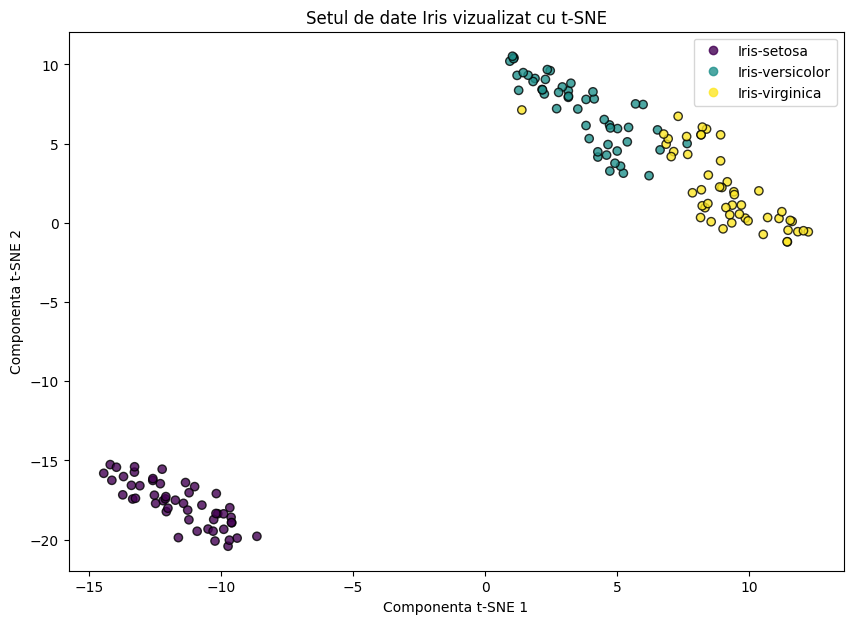

In [9]:
df_iris = pd.read_csv('ML-datasets/iris.csv')
X_iris = df_iris.drop('species', axis=1)
iris_labels = df_iris['species'].astype('category').cat.codes

# Exemplu 5: Aplicarea t-SNE pe setul de date 'iris'

from sklearn.manifold import TSNE

# Folosim datele originale X_iris, deoarece t-SNE nu este la fel de sensibil la
# scală ca PCA, deși standardizarea este în general o practică bună.

# Inițializăm t-SNE pentru a reduce datele la 2 componente.
# `learning_rate` și `perplexity` sunt hiperparametri importanți.
# `random_state` asigură reproductibilitatea.
tsne = TSNE(n_components=2, learning_rate='auto', init='random', random_state=42)

# Aplicăm transformarea
X_iris_tsne = tsne.fit_transform(X_iris)

# Vizualizăm rezultatul
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_iris_tsne[:, 0], X_iris_tsne[:, 1], c=iris_labels, cmap='viridis', edgecolor='k', alpha=0.8)
plt.title('Setul de date Iris vizualizat cu t-SNE')
plt.xlabel('Componenta t-SNE 1')
plt.ylabel('Componenta t-SNE 2')
plt.legend(handles=scatter.legend_elements()[0], labels=list(df_iris['species'].unique()))
plt.show()

# OBS.: Observați cât de bine definite și separate sunt clusterele pentru
# fiecare specie de iris. t-SNE excelează la acest tip de vizualizare, făcând
# structura datelor foarte clară.

In [ ]:
# __EXERCIȚIU__
# Acum este rândul tău să aplici t-SNE pe setul de date 'wine'.
# 1. Selectează caracteristicile (X_wine) și ținta (y_wine) din DataFrame-ul 'df_wine'.
# 2. Aplică t-SNE pe X_wine pentru a reduce datele la 2 dimensiuni.
# 3. Creează un scatter plot al rezultatului, colorând punctele după clasa de vin (y_wine).

# 1. Datele sunt deja încărcate (X_wine, y_wine)

# 2. Aplică t-SNE
tsne_wine = TSNE(n_components=2, learning_rate='auto', init='random', random_state=42)
X_wine_tsne = # ...

# 3. Creează graficul
plt.figure(figsize=(10, 7))
# ...
plt.title('Setul de date Wine vizualizat cu t-SNE')
plt.xlabel('Componenta t-SNE 1')
plt.ylabel('Componenta t-SNE 2')
plt.show()


# HINT: Poți folosi aceeași configurație pentru t-SNE ca în exemplul anterior,
# inclusiv `random_state` pentru a obține un rezultat consistent.